<a href="https://colab.research.google.com/github/akashgardas/Data-Science/blob/main/Anova/OneWayAnova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One Way Anova


In [2]:
from scipy.stats import f

def test_one_way_anova(data, alpha=0.05):
  k = len(data[0])
  N = sum([len(group) for group in data])

  print(k, N)

  # means
  grand_mean = np.mean(data)
  group_means = np.mean(data, axis=0)

  # sum of squares between groups
  ssb = np.sum((group_means - grand_mean)** 2) * len(data)

  # sum of squares within groups
  ssw = np.sum((data - group_means)** 2)

  # sum of squares total
  sst = ssb + ssw

  # degree of freedom
  dfb = k - 1
  dfw = N - k
  dft = dfb + dfw

  # mean squares
  msb = ssb / dfb
  msw = ssw / dfw

  # f-statistic
  fstat = msb / msw

  # critical value
  fcrit = f.ppf(1 - alpha, dfb, dfw)

  # return stats as dictionary
  stats = {
      'grand mean': grand_mean,
      'group means': group_means,
      'ssb': ssb,
      'ssw': ssw,
      'sst': sst,
      'dfb': dfb,
      'dfw': dfw,
      'dft': dft,
      'msb': msb,
      'msw': msw,
      'fstat': fstat,
      'fcrit': fcrit
  }

  return stats

In [3]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(io.StringIO('''
fertilizer A,fertilizer B,fertilizer C
24,27,21
26,28,22
23,29,20
20,30,19
22,26,22
'''), header=0)

df

,fertilizer A,fertilizer B,fertilizer C
0,24,27,21
1,26,28,22
2,23,29,20
3,20,30,19
4,22,26,22


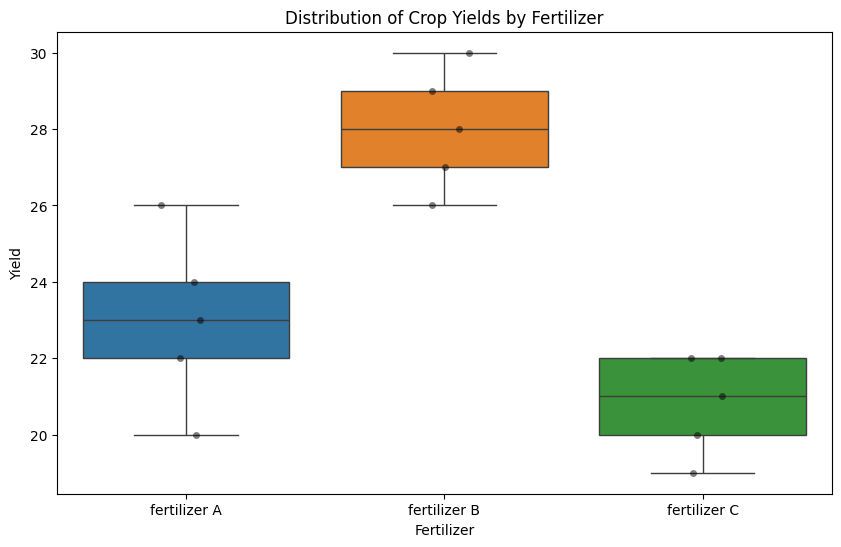

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
sns.stripplot(data=df, color='black', alpha=0.5)
plt.title('Distribution of Crop Yields by Fertilizer')
plt.xlabel('Fertilizer')
plt.ylabel('Yield')
plt.show()

In [6]:
fertilizer_data = np.array(df)
fertilizer_data

array([[24, 27, 21],
       [26, 28, 22],
       [23, 29, 20],
       [20, 30, 19],
       [22, 26, 22]])

In [7]:
stats = test_one_way_anova(fertilizer_data)
for stat, value in stats.items():
  print(f'{stat}: {value}')

print('-' * 30)
if stats['fstat'] > stats['fcrit']:
  print('Reject null hypothesis')
else:
  print('Fail to reject null hypothesis')

3 15
grand mean: 23.933333333333334
group means: [23.  28.  20.8]
ssb: 136.13333333333333
ssw: 36.8
sst: 172.93333333333334
dfb: 2
dfw: 12
dft: 14
msb: 68.06666666666666
msw: 3.0666666666666664
fstat: 22.195652173913043
fcrit: 3.885293834652391
------------------------------
Reject null hypothesis


# Testing with UCIML dataset
Dataset: Wine
ID: 109

In [10]:
# pip install ucimlrepo

In [11]:
from ucimlrepo import fetch_ucirepo

In [12]:
# fetch dataset
wine = fetch_ucirepo(id=109)

# Extracting the data
X = wine.data.features
y = wine.data.targets

# Extracting the variables info
variables = wine.variables

In [13]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [20]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [15]:
variables

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,None,None,no
1,Alcohol,Feature,Continuous,None,None,None,no
2,Malicacid,Feature,Continuous,None,None,None,no
3,Ash,Feature,Continuous,None,None,None,no
4,Alcalinity_of_ash,Feature,Continuous,None,None,None,no
5,Magnesium,Feature,Integer,None,None,None,no
6,Total_phenols,Feature,Continuous,None,None,None,no
7,Flavanoids,Feature,Continuous,None,None,None,no
8,Nonflavanoid_phenols,Feature,Continuous,None,None,None,no
9,Proanthocyanins,Feature,Continuous,None,None,None,no


In [43]:
df = pd.DataFrame(X)
df['Wine_class'] = y
df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,Wine_class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


**TEST**
Testing to understand the *Alcohol* across different *wine classes*

In [44]:
# Extracting the data required for the test
df = df[['Wine_class', 'Alcohol']]
df

,Wine_class,Alcohol
0,1,14.23
1,1,13.20
2,1,13.16
3,1,14.37
4,1,13.24
...,...,...
173,3,13.71
174,3,13.40
175,3,13.27
176,3,13.17


In [45]:
# each class count
df.groupby('Wine_class').count()

,Alcohol
Wine_class,
1,59
2,71
3,48


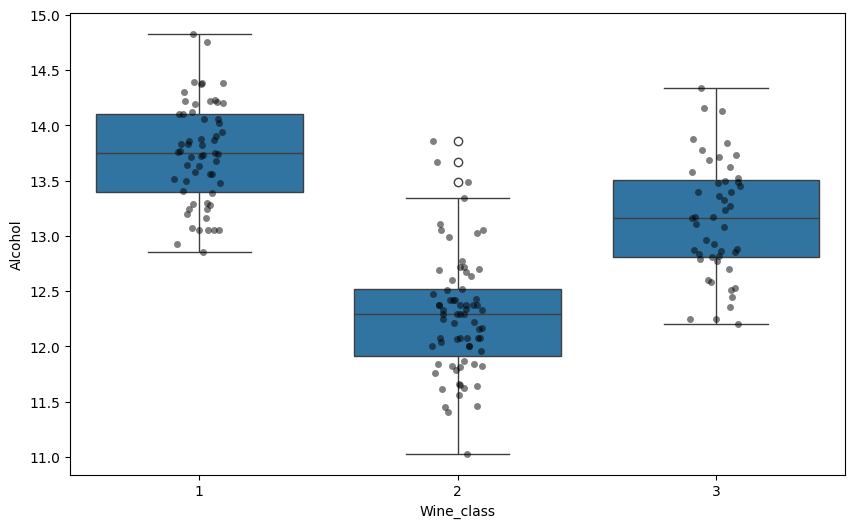

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Wine_class', y='Alcohol')
sns.stripplot(data=df, x='Wine_class', y='Alcohol', color='black', alpha=0.5)
plt.show()

In [66]:
wine_1 = df[df['Wine_class'] == 1]['Alcohol']
wine_2 = df[df['Wine_class'] == 2]['Alcohol']
wine_3 = df[df['Wine_class'] == 3]['Alcohol']
[wine_1, wine_2, wine_3]

[0     14.23
 1     13.20
 2     13.16
 3     14.37
 4     13.24
 5     14.20
 6     14.39
 7     14.06
 8     14.83
 9     13.86
 10    14.10
 11    14.12
 12    13.75
 13    14.75
 14    14.38
 15    13.63
 16    14.30
 17    13.83
 18    14.19
 19    13.64
 20    14.06
 21    12.93
 22    13.71
 23    12.85
 24    13.50
 25    13.05
 26    13.39
 27    13.30
 28    13.87
 29    14.02
 30    13.73
 31    13.58
 32    13.68
 33    13.76
 34    13.51
 35    13.48
 36    13.28
 37    13.05
 38    13.07
 39    14.22
 40    13.56
 41    13.41
 42    13.88
 43    13.24
 44    13.05
 45    14.21
 46    14.38
 47    13.90
 48    14.10
 49    13.94
 50    13.05
 51    13.83
 52    13.82
 53    13.77
 54    13.74
 55    13.56
 56    14.22
 57    13.29
 58    13.72
 Name: Alcohol, dtype: float64,
 59     12.37
 60     12.33
 61     12.64
 62     13.67
 63     12.37
        ...  
 125    12.07
 126    12.43
 127    11.79
 128    12.37
 129    12.04
 Name: Alcohol, Length: 71, dtype: float64,
 13